## 『本次練習內容』
#### 運用Keras搭建簡單的Dense Layer與 Convolution2D Layer，使用相同Neurons數量，計算總參數量相差多少。


## 『本次練習目的』
  #### 本次練習主要是要讓各位同學們了解CNN與FC層的參數使用量差異
  #### Convolution2D有許多參數可以設置，之後章節會細談
  #### 不熟Keras的學員們也可以藉此了解NN層的不同搭法

## dense 層
Param = （輸入數據維度+1）* 神經元個數 
> 之所以要加1，是考慮到每個神經元都有一個Bias。

## Conv1D
Param = (卷積核大小 x 詞向量維度 + 1) x 卷積核個數 

## Conv2D
Param = （卷積核長度 x 卷積核寬度 x 通道數 + 1）x 卷積核個數 
> 下一層的通道數 = 上一層的捲積核個數 

## klayers.Embedding() ：詞嵌入層
Param = 詞表數*詞向量維度

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.
/home/gemini/miniconda3/envs/back-matting/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gemini/miniconda3/envs/back-matting/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gemini/miniconda3/envs/back-matting/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [18]:
##輸入照片尺寸==28*28*1
##都用一層，288個神經元

##建造一個一層的CNN層
classifier = Sequential()

##Kernel size 3*3，用32張，輸入大小28*28*1
classifier.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu')) #32張Kernel，大小為3*3，輸入尺寸為28*28*1
##看看model結構
print(classifier.summary())
#理解輸出Total params為何==320

# (3x3x1 + 1) x32 = 320

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
None


/home/gemini/miniconda3/envs/back-matting/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


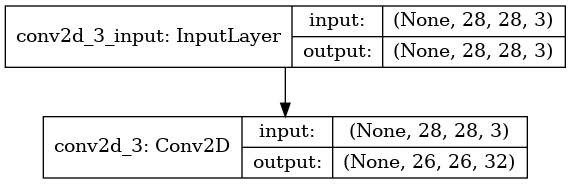

In [17]:
from keras.utils import plot_model
plot_model(classifier, to_file='model1.png',show_shapes=True)

In [14]:
##建造一個一層的FC層
model = Sequential()

##輸入為28*28*1攤平==784
inputs = Input(shape=(784,))#輸入尺寸為28*28*1

##CNN中用了(3*3*1)*32個神經元，我們這邊也用相同神經元數量
x = Dense(units=288)(inputs)#使用288個神經元
model = Model(inputs=inputs, outputs=x)

##看看model結構
print(model.summary())
#理解輸出Total params為何==226080
# (上一層輸出維度為=這一層輸入=784 + 1) * 此曾神經元個數288 = 226080


##大家可以自己變換設定看看參數變化

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 288)               226080    
Total params: 226,080
Trainable params: 226,080
Non-trainable params: 0
_________________________________________________________________
None


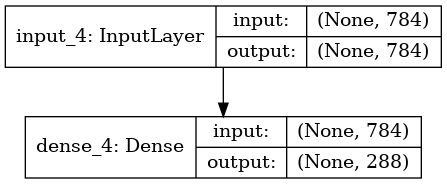

In [15]:
from keras.utils import plot_model
plot_model(model, to_file='model2.png',show_shapes=True)